In [1]:
import pandas as pd
import numpy as np
import requests

import json
from pandas.io.json import json_normalize
from datetime import timedelta, date
import time
import pickle
import glob

pd.set_option('display.max_columns', 500)


In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

In [3]:
def read_pickle(file):
    with open(file, 'rb') as picklefile:
        data = pickle.load(picklefile)
    return(data)

def write_pickle(file, data):
    with open(file, 'wb') as picklefile:
        pickle.dump(data, picklefile)

In [4]:
player_file_list = glob.glob('/Users/JacKuo14/Documents/Metis/course_work/project03_baseball/sportstradar_data2/*player*.pkl')
gamefile_list = glob.glob('/Users/JacKuo14/Documents/Metis/course_work/project03_baseball/sportstradar_data2/*game*.pkl')

In [5]:
# Create 
df_game = pd.DataFrame()
for file in gamefile_list:
    df_game = df_game.append(read_pickle(file))
    
df_play = pd.DataFrame()
for file in player_file_list:
    df_play = df_play.append(read_pickle(file))

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [6]:
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield (date1 + timedelta(n))

# 2015
dt_15_list = []
start_dt = date(2015, 5, 5)
end_dt = date(2015, 10, 4)
for dt in daterange(start_dt, end_dt):
    dt_15_list.append(dt)

#2016    
dt_16_list = []
start_dt = date(2016, 5, 3)
end_dt = date(2016, 10, 2)
for dt in daterange(start_dt, end_dt):
    dt_16_list.append(dt)

date_list = dt_15_list + dt_16_list


In [7]:
df_game['game.date'] = pd.to_datetime(df_game['game.scheduled']).dt.date

df_game_sub = df_game[['game.id',
         'game.scheduled', 
         'game.date',
        'game.home.runs', 'game.away.runs','game.away.lineup', 
         'game.home.lineup', 
         'game.home_team', 
         'game.away_team', 
         'game.attendance']][df_game['game.date'].isin(date_list)].reset_index(drop = True)

df_game_sub['game.winning.team'] = np.where(df_game_sub['game.home.runs'] - df_game_sub['game.away.runs'] > 0, '1', '0')

In [8]:
df_game_sub['game.winning.team'].value_counts()


1    2281
0    1928
Name: game.winning.team, dtype: int64

In [9]:
path = '/Users/JacKuo14/Documents/Metis/course_work/project03_baseball/sportstradar_data2/player_stats/'
away1 = glob.glob(path + '*away1*.pkl')
away7 = glob.glob(path + '*away7*.pkl')
away30 = glob.glob(path + '*away30*.pkl')

home1 = glob.glob(path + '*home1*.pkl')
home7 = glob.glob(path + '*home7*.pkl')
home30 = glob.glob(path + '*home30*.pkl')

In [10]:
# AWAY - Avg last game
df_away1 = pd.DataFrame()
for file in away1:
    df_away1 = df_away1.append(read_pickle(file))
df_away1_group = df_away1.groupby('game_id').mean().reset_index() # groupby game_id to find mean of values for each game
df_away1_group.columns = [str(col) + '_away' for col in df_away1_group.columns]
df_away1_group = df_away1_group.rename(columns = {'game_id_away': 'game.id'})

# AWAY - Avg last 7 games
df_away7 = pd.DataFrame()
for file in away7:
    df_away7 = df_away7.append(read_pickle(file))
df_away7_group = df_away7.groupby('game_id').mean().reset_index()
df_away7_group.columns = [str(col) + '_away' for col in df_away7_group.columns]
df_away7_group = df_away7_group.rename(columns = {'game_id_away': 'game.id'})

                                       
# AWAY - Avg last 30 game
df_away30 = pd.DataFrame()
for file in away30:
    df_away30 = df_away30.append(read_pickle(file))
df_away30_group = df_away30.groupby('game_id').mean().reset_index()
df_away30_group.columns = [str(col) + '_away' for col in df_away30_group.columns]
df_away30_group = df_away30_group.rename(columns = {'game_id_away': 'game.id'})
                                       

# -----------------------------------

# HOME - Avg last game
df_home1 = pd.DataFrame()
for file in away1:
    df_home1 = df_home1.append(read_pickle(file))
df_home1_group = df_home1.groupby('game_id').mean().reset_index() # groupby game_id to find mean of values for each game
df_home1_group.columns = [str(col) + '_home' for col in df_home1_group.columns]
df_home1_group = df_home1_group.rename(columns = {'game_id_home': 'game.id'})

# HOME - Avg last 7 games
df_home7 = pd.DataFrame()
for file in away7:
    df_home7 = df_home7.append(read_pickle(file))
df_home7_group = df_home7.groupby('game_id').mean().reset_index()
df_home7_group.columns = [str(col) + '_home' for col in df_home7_group.columns]
df_home7_group = df_home7_group.rename(columns = {'game_id_home': 'game.id'})
                                       
# HOME - Avg last 30 game
df_home30 = pd.DataFrame()
for file in away30:
    df_home30 = df_home30.append(read_pickle(file))
df_home30_group = df_home30.groupby('game_id').mean().reset_index()
df_home30_group.columns = [str(col) + '_home' for col in df_home30_group.columns]
df_home30_group = df_home30_group.rename(columns = {'game_id_home': 'game.id'})

In [11]:
group_df_list = [df_away1_group, df_away7_group, df_away30_group, df_home1_group, df_home7_group, df_home30_group]

df_game_sub_merged = df_game_sub

for df in group_df_list:
    df_game_sub_merged = pd.merge(df_game_sub_merged, df, how = 'left', on = 'game.id')

In [12]:
df_game_sub_merged = df_game_sub_merged.dropna(axis=1, how='all')


# Baseline Model

In [26]:
# all_agg_cols produced test score of 54% accuracy


4209

# Baseline with all features that have more than 1000 rows filled in

In [ ]:
# all_agg_cols produced test score of 54% accuracy for Random Forest


In [130]:
cols_to_drop = ['obp_1_away', 'obp_7_away', 'obp_30_away', 
'av_risp_1_away', 'av_risp_7_away', 'av_risp_30_away',
'hit_risp_1_away', 'hit_risp_7_away', 'hit_risp_30_away',
'obp_1_home', 'obp_7_home', 'obp_30_home',
'av_risp_1_home', 'av_risp_7_home', 'av_risp_30_home',
'hit_risp_1_home', 'hit_risp_7_home', 'hit_risp_30_home',
'game.scheduled', 'game.date', 'game.home.runs', 'game.away.runs', 
'game.away.lineup', 'game.home.lineup', 'game.home_team', 'game.away_team', 'game.id']

In [131]:
df_baseline = df_game_sub_merged.drop(columns = cols_to_drop)


In [88]:
df_baseline.shape


(4209, 64)

In [132]:
target = df_baseline['game.winning.team']
df_baseline.drop(labels=['game.winning.team'], axis=1,inplace = True)
df_baseline.insert(0, 'game.winning.team', target)


In [133]:
df_baseline.head()


,game.winning.team,game.attendance,era_1_away,whip_1_away,k9_1_away,pitch_count_1_away,ops_1_away,slg_1_away,rbi_1_away,avg_1_away,runs_1_away,error_1_away,fpct_1_away,era_7_away,error_7_away,fpct_7_away,k9_7_away,ops_7_away,pitch_count_7_away,rbi_7_away,runs_7_away,slg_7_away,whip_7_away,era_30_away,error_30_away,fpct_30_away,k9_30_away,ops_30_away,pitch_count_30_away,rbi_30_away,runs_30_away,slg_30_away,whip_30_away,era_1_home,whip_1_home,k9_1_home,pitch_count_1_home,ops_1_home,slg_1_home,rbi_1_home,avg_1_home,runs_1_home,error_1_home,fpct_1_home,era_7_home,error_7_home,fpct_7_home,k9_7_home,ops_7_home,pitch_count_7_home,rbi_7_home,runs_7_home,slg_7_home,whip_7_home,era_30_home,error_30_home,fpct_30_home,k9_30_home,ops_30_home,pitch_count_30_home,rbi_30_home,runs_30_home,slg_30_home,whip_30_home
0,1,44680.0,5.5125,2.975,18.3375,31.0,0.522571,0.228500,0.071429,0.210643,0.142857,0.076923,0.839154,2.035714,0.010989,0.697168,6.750000,0.455286,12.952381,0.252747,0.252747,0.213176,1.314286,NaN,0.038889,0.930890,NaN,0.670067,NaN,0.383333,0.466667,0.350911,NaN,5.5125,2.975,18.3375,31.0,0.522571,0.228500,0.071429,0.210643,0.142857,0.076923,0.839154,2.035714,0.010989,0.697168,6.750000,0.455286,12.952381,0.252747,0.252747,0.213176,1.314286,NaN,0.038889,0.930890,NaN,0.670067,NaN,0.383333,0.466667,0.350911,NaN
1,1,30946.0,9.3600,2.200,1.8000,25.8,0.555600,0.337800,0.200000,0.217800,0.200000,0.000000,0.615385,5.571429,0.054945,0.767407,9.150000,0.569253,15.904762,0.274725,0.340659,0.312286,1.890476,NaN,0.059040,0.909896,NaN,0.675481,NaN,0.329630,0.348148,0.358763,NaN,9.3600,2.200,1.8000,25.8,0.555600,0.337800,0.200000,0.217800,0.200000,0.000000,0.615385,5.571429,0.054945,0.767407,9.150000,0.569253,15.904762,0.274725,0.340659,0.312286,1.890476,NaN,0.059040,0.909896,NaN,0.675481,NaN,0.329630,0.348148,0.358763,NaN
2,1,15168.0,4.5000,2.500,0.0000,15.5,0.425000,0.200000,0.100000,0.125000,0.100000,0.111111,0.666667,3.765286,0.043290,0.778621,4.186286,0.531914,36.714286,0.257143,0.285714,0.275957,1.839286,NaN,0.054919,0.865585,NaN,0.692386,NaN,0.390476,0.428571,0.371748,NaN,4.5000,2.500,0.0000,15.5,0.425000,0.200000,0.100000,0.125000,0.100000,0.111111,0.666667,3.765286,0.043290,0.778621,4.186286,0.531914,36.714286,0.257143,0.285714,0.275957,1.839286,NaN,0.054919,0.865585,NaN,0.692386,NaN,0.390476,0.428571,0.371748,NaN
3,0,13614.0,8.4376,1.625,9.4500,28.0,0.956917,0.448583,1.083333,0.302750,1.250000,0.142857,0.654786,6.937524,0.069841,0.705784,8.276786,0.723967,18.428571,0.439560,0.516484,0.421407,1.549107,NaN,0.178161,0.909983,NaN,0.761583,NaN,0.466667,0.477778,0.429078,NaN,8.4376,1.625,9.4500,28.0,0.956917,0.448583,1.083333,0.302750,1.250000,0.142857,0.654786,6.937524,0.069841,0.705784,8.276786,0.723967,18.428571,0.439560,0.516484,0.421407,1.549107,NaN,0.178161,0.909983,NaN,0.761583,NaN,0.466667,0.477778,0.429078,NaN
4,1,20046.0,7.2000,1.600,5.4000,92.0,0.921700,0.486700,0.500000,0.378300,0.400000,0.000000,0.888889,2.567286,0.028571,0.841662,6.267857,0.584486,92.000000,0.257143,0.300000,0.288086,1.203700,NaN,0.033333,0.877403,NaN,0.722676,NaN,0.428571,0.471429,0.393638,NaN,7.2000,1.600,5.4000,92.0,0.921700,0.486700,0.500000,0.378300,0.400000,0.000000,0.888889,2.567286,0.028571,0.841662,6.267857,0.584486,92.000000,0.257143,0.300000,0.288086,1.203700,NaN,0.033333,0.877403,NaN,0.722676,NaN,0.428571,0.471429,0.393638,NaN


In [134]:
all_agg_cols = df_baseline.columns.to_list()


In [135]:
df_baseline = df_baseline.dropna()


In [136]:
X_train, X_test, y_train, y_test = train_test_split(df_baseline.iloc[:, 1:], df_baseline.iloc[:, 0], 
                                                    test_size = 0.2, random_state=42)

In [93]:
from sklearn.metrics import accuracy_score


In [155]:
## RANDOM FOREST ##
rf = RandomForestClassifier(n_estimators = 1000, max_depth = 5)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)

print("train accuracy: ", accuracy_score(y_train, rf.predict(X_train)))
print("test accuracy: ", accuracy_score(y_test, y_predict))

train accuracy:  0.8121761658031088
test accuracy:  0.5310880829015544


In [102]:
feature_importances = pd.DataFrame(rf.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)

In [129]:
feature_importances.sum()


importance    1.0
dtype: float64

In [104]:
feature_importances[:20]


,importance
game.attendance,0.022153
k9_30_home,0.022011
whip_7_away,0.020036
whip_7_home,0.019217
k9_30_away,0.018887
pitch_count_7_away,0.018856
pitch_count_7_home,0.018466
pitch_count_30_away,0.018423
fpct_7_away,0.018107
error_30_home,0.017891


In [123]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*knn.score(X_test, y_test)))

The score for kNN is
Training:  64.96%
Test set:  53.89%


In [211]:
X_train.head()

,game.attendance,era_1_away,whip_1_away,k9_1_away,pitch_count_1_away,ops_1_away,slg_1_away,rbi_1_away,avg_1_away,runs_1_away,error_1_away,fpct_1_away,era_7_away,error_7_away,fpct_7_away,k9_7_away,ops_7_away,pitch_count_7_away,rbi_7_away,runs_7_away,slg_7_away,whip_7_away,era_30_away,error_30_away,fpct_30_away,k9_30_away,ops_30_away,pitch_count_30_away,rbi_30_away,runs_30_away,slg_30_away,whip_30_away,era_1_home,whip_1_home,k9_1_home,pitch_count_1_home,ops_1_home,slg_1_home,rbi_1_home,avg_1_home,runs_1_home,error_1_home,fpct_1_home,era_7_home,error_7_home,fpct_7_home,k9_7_home,ops_7_home,pitch_count_7_home,rbi_7_home,runs_7_home,slg_7_home,whip_7_home,era_30_home,error_30_home,fpct_30_home,k9_30_home,ops_30_home,pitch_count_30_home,rbi_30_home,runs_30_home,slg_30_home,whip_30_home
2641,38875.0,1.714200,0.723800,3.7872,37.600000,0.467474,0.214000,0.157895,0.214000,0.263158,0.000000,0.789474,8.014786,0.050265,0.707675,4.892786,0.566632,26.166667,0.357143,0.406085,0.296939,1.387981,13.833878,0.056274,0.756641,3.45138,0.492227,29.240000,0.304904,0.318314,0.261557,1.432529,1.714200,0.723800,3.7872,37.600000,0.467474,0.214000,0.157895,0.214000,0.263158,0.000000,0.789474,8.014786,0.050265,0.707675,4.892786,0.566632,26.166667,0.357143,0.406085,0.296939,1.387981,13.833878,0.056274,0.756641,3.45138,0.492227,29.240000,0.304904,0.318314,0.261557,1.432529
2536,41838.0,0.900000,1.083333,6.6000,23.833333,0.585438,0.297938,0.312500,0.214562,0.312500,0.000000,0.571429,10.594905,0.058730,0.536341,8.776500,0.471786,21.000000,0.285714,0.285714,0.241455,2.123129,3.862500,0.063855,0.657518,9.55170,0.419337,21.216667,0.214286,0.235884,0.216035,1.533125,0.900000,1.083333,6.6000,23.833333,0.585438,0.297938,0.312500,0.214562,0.312500,0.000000,0.571429,10.594905,0.058730,0.536341,8.776500,0.471786,21.000000,0.285714,0.285714,0.241455,2.123129,3.862500,0.063855,0.657518,9.55170,0.419337,21.216667,0.214286,0.235884,0.216035,1.533125
1582,31122.0,16.285667,2.277778,12.6790,24.666667,0.242364,0.143909,0.000000,0.098455,0.000000,0.052632,0.363158,6.565460,0.007519,0.495489,11.321571,0.471844,23.269841,0.142857,0.181818,0.266247,1.472668,4.875000,0.033777,0.653142,8.37000,0.413722,14.913333,0.208889,0.235556,0.232733,1.362333,16.285667,2.277778,12.6790,24.666667,0.242364,0.143909,0.000000,0.098455,0.000000,0.052632,0.363158,6.565460,0.007519,0.495489,11.321571,0.471844,23.269841,0.142857,0.181818,0.266247,1.472668,4.875000,0.033777,0.653142,8.37000,0.413722,14.913333,0.208889,0.235556,0.232733,1.362333
1491,19876.0,5.884667,1.846150,13.8465,25.166667,0.645750,0.437438,0.500000,0.187438,0.375000,0.062500,0.552063,3.083690,0.051339,0.583740,9.333429,0.424238,25.238095,0.169643,0.206845,0.243440,1.488410,8.100000,0.037052,0.651846,9.01000,0.550908,13.233333,0.302778,0.302778,0.327211,2.103333,5.884667,1.846150,13.8465,25.166667,0.645750,0.437438,0.500000,0.187438,0.375000,0.062500,0.552063,3.083690,0.051339,0.583740,9.333429,0.424238,25.238095,0.169643,0.206845,0.243440,1.488410,8.100000,0.037052,0.651846,9.01000,0.550908,13.233333,0.302778,0.302778,0.327211,2.103333
2135,16370.0,5.143000,1.285733,6.4290,36.000000,0.339692,0.179462,0.230769,0.141000,0.230769,0.090909,0.717182,5.063714,0.043956,0.749788,7.795714,0.534055,48.190476,0.274725,0.263736,0.302374,1.447533,6.738741,0.024180,0.853281,6.58300,0.698697,79.111111,0.386667,0.426667,0.393573,1.730919,5.143000,1.285733,6.4290,36.000000,0.339692,0.179462,0.230769,0.141000,0.230769,0.090909,0.717182,5.063714,0.043956,0.749788,7.795714,0.534055,48.190476,0.274725,0.263736,0.302374,1.447533,6.738741,0.024180,0.853281,6.58300,0.698697,79.111111,0.386667,0.426667,0.393573,1.730919


In [216]:
X_tr

StandardScaler(copy=      game.attendance  era_1_away  whip_1_away  k9_1_away  pitch_count_1_away  \
2641          38875.0    1.714200     0.723800    3.78720           37.600000   
2536          41838.0    0.900000     1.083333    6.60000           23.833333   
1582          31122.0   16.285667     2.277778   12.67900           24.666667   
1491          19876.0    5.884667     1.846150   13.84650           25.166667   
2135          16370.0    5.143000     1.285733    6.42900           36.000000   
...               ...         ...          ...        ...                 ...   
1597          41346.0    7.892400     1.761540    6.7...
      runs_30_home  slg_30_home  whip_30_home  
2641      0.318314     0.261557      1.432529  
2536      0.235884     0.216035      1.533125  
1582      0.235556     0.232733      1.362333  
1491      0.302778     0.327211      2.103333  
2135      0.426667     0.393573      1.730919  
...            ...          ...           ...  
1597      0.407407  

In [215]:
from sklearn.preprocessing import StandardScaler
#std_scale = StandardScaler()

X_tr = std_scale(X_train)

X_tr = StandardScaler(X_train)
X_te = StandardScaler(X_test)

logit = LogisticRegression(C = 10)
logit.fit(X_tr, y_train)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_tr, y_train)))
print("Test set: {:6.2f}%".format(100*logit.score(X_te, y_test)))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


TypeError: float() argument must be a string or a number, not 'StandardScaler'

In [152]:
y_test.astype('int')

1836    0
2428    1
2648    1
1628    1
819     1
       ..
1134    0
1333    0
1850    0
1673    1
1671    0
Name: game.winning.team, Length: 386, dtype: int64

In [153]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(np.array(y_test.astype('int')), rf.predict_proba(X_test)[:,1])


ROC AUC score =  0.5689121957778674


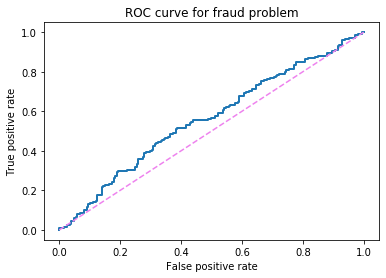

In [157]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(np.array(y_test.astype('int')), rf.predict_proba(X_test)[:,1]))

In [158]:
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [163]:
### XGBOOST ###
###
df_baseline = df_game_sub_merged.drop(columns = cols_to_drop)

In [164]:
df_baseline.head()

,game.attendance,game.winning.team,era_1_away,whip_1_away,k9_1_away,pitch_count_1_away,ops_1_away,slg_1_away,rbi_1_away,avg_1_away,runs_1_away,error_1_away,fpct_1_away,era_7_away,error_7_away,fpct_7_away,k9_7_away,ops_7_away,pitch_count_7_away,rbi_7_away,runs_7_away,slg_7_away,whip_7_away,era_30_away,error_30_away,fpct_30_away,k9_30_away,ops_30_away,pitch_count_30_away,rbi_30_away,runs_30_away,slg_30_away,whip_30_away,era_1_home,whip_1_home,k9_1_home,pitch_count_1_home,ops_1_home,slg_1_home,rbi_1_home,avg_1_home,runs_1_home,error_1_home,fpct_1_home,era_7_home,error_7_home,fpct_7_home,k9_7_home,ops_7_home,pitch_count_7_home,rbi_7_home,runs_7_home,slg_7_home,whip_7_home,era_30_home,error_30_home,fpct_30_home,k9_30_home,ops_30_home,pitch_count_30_home,rbi_30_home,runs_30_home,slg_30_home,whip_30_home
0,44680.0,1,5.5125,2.975,18.3375,31.0,0.522571,0.228500,0.071429,0.210643,0.142857,0.076923,0.839154,2.035714,0.010989,0.697168,6.750000,0.455286,12.952381,0.252747,0.252747,0.213176,1.314286,NaN,0.038889,0.930890,NaN,0.670067,NaN,0.383333,0.466667,0.350911,NaN,5.5125,2.975,18.3375,31.0,0.522571,0.228500,0.071429,0.210643,0.142857,0.076923,0.839154,2.035714,0.010989,0.697168,6.750000,0.455286,12.952381,0.252747,0.252747,0.213176,1.314286,NaN,0.038889,0.930890,NaN,0.670067,NaN,0.383333,0.466667,0.350911,NaN
1,30946.0,1,9.3600,2.200,1.8000,25.8,0.555600,0.337800,0.200000,0.217800,0.200000,0.000000,0.615385,5.571429,0.054945,0.767407,9.150000,0.569253,15.904762,0.274725,0.340659,0.312286,1.890476,NaN,0.059040,0.909896,NaN,0.675481,NaN,0.329630,0.348148,0.358763,NaN,9.3600,2.200,1.8000,25.8,0.555600,0.337800,0.200000,0.217800,0.200000,0.000000,0.615385,5.571429,0.054945,0.767407,9.150000,0.569253,15.904762,0.274725,0.340659,0.312286,1.890476,NaN,0.059040,0.909896,NaN,0.675481,NaN,0.329630,0.348148,0.358763,NaN
2,15168.0,1,4.5000,2.500,0.0000,15.5,0.425000,0.200000,0.100000,0.125000,0.100000,0.111111,0.666667,3.765286,0.043290,0.778621,4.186286,0.531914,36.714286,0.257143,0.285714,0.275957,1.839286,NaN,0.054919,0.865585,NaN,0.692386,NaN,0.390476,0.428571,0.371748,NaN,4.5000,2.500,0.0000,15.5,0.425000,0.200000,0.100000,0.125000,0.100000,0.111111,0.666667,3.765286,0.043290,0.778621,4.186286,0.531914,36.714286,0.257143,0.285714,0.275957,1.839286,NaN,0.054919,0.865585,NaN,0.692386,NaN,0.390476,0.428571,0.371748,NaN
3,13614.0,0,8.4376,1.625,9.4500,28.0,0.956917,0.448583,1.083333,0.302750,1.250000,0.142857,0.654786,6.937524,0.069841,0.705784,8.276786,0.723967,18.428571,0.439560,0.516484,0.421407,1.549107,NaN,0.178161,0.909983,NaN,0.761583,NaN,0.466667,0.477778,0.429078,NaN,8.4376,1.625,9.4500,28.0,0.956917,0.448583,1.083333,0.302750,1.250000,0.142857,0.654786,6.937524,0.069841,0.705784,8.276786,0.723967,18.428571,0.439560,0.516484,0.421407,1.549107,NaN,0.178161,0.909983,NaN,0.761583,NaN,0.466667,0.477778,0.429078,NaN
4,20046.0,1,7.2000,1.600,5.4000,92.0,0.921700,0.486700,0.500000,0.378300,0.400000,0.000000,0.888889,2.567286,0.028571,0.841662,6.267857,0.584486,92.000000,0.257143,0.300000,0.288086,1.203700,NaN,0.033333,0.877403,NaN,0.722676,NaN,0.428571,0.471429,0.393638,NaN,7.2000,1.600,5.4000,92.0,0.921700,0.486700,0.500000,0.378300,0.400000,0.000000,0.888889,2.567286,0.028571,0.841662,6.267857,0.584486,92.000000,0.257143,0.300000,0.288086,1.203700,NaN,0.033333,0.877403,NaN,0.722676,NaN,0.428571,0.471429,0.393638,NaN


In [187]:
df_baseline = df_game_sub_merged.drop(columns = cols_to_drop)
target = df_baseline['game.winning.team']
df_baseline.drop(labels=['game.winning.team'], axis=1,inplace = True)
df_baseline.insert(0, 'game.winning.team', target)
df_baseline = df_baseline.dropna()

In [188]:
df_baseline.head()

,game.winning.team,game.attendance,era_1_away,whip_1_away,k9_1_away,pitch_count_1_away,ops_1_away,slg_1_away,rbi_1_away,avg_1_away,runs_1_away,error_1_away,fpct_1_away,era_7_away,error_7_away,fpct_7_away,k9_7_away,ops_7_away,pitch_count_7_away,rbi_7_away,runs_7_away,slg_7_away,whip_7_away,era_30_away,error_30_away,fpct_30_away,k9_30_away,ops_30_away,pitch_count_30_away,rbi_30_away,runs_30_away,slg_30_away,whip_30_away,era_1_home,whip_1_home,k9_1_home,pitch_count_1_home,ops_1_home,slg_1_home,rbi_1_home,avg_1_home,runs_1_home,error_1_home,fpct_1_home,era_7_home,error_7_home,fpct_7_home,k9_7_home,ops_7_home,pitch_count_7_home,rbi_7_home,runs_7_home,slg_7_home,whip_7_home,era_30_home,error_30_home,fpct_30_home,k9_30_home,ops_30_home,pitch_count_30_home,rbi_30_home,runs_30_home,slg_30_home,whip_30_home
79,1,40552.0,0.56250,1.164588,3.506625,33.125000,0.621227,0.350386,0.227273,0.236750,0.272727,0.020833,0.809021,4.454077,0.040064,0.656915,9.294589,0.668214,32.151786,0.350649,0.396104,0.373578,1.406146,4.429043,0.042203,0.699396,8.34735,0.552051,22.844444,0.306741,0.349556,0.306841,1.383094,0.56250,1.164588,3.506625,33.125000,0.621227,0.350386,0.227273,0.236750,0.272727,0.020833,0.809021,4.454077,0.040064,0.656915,9.294589,0.668214,32.151786,0.350649,0.396104,0.373578,1.406146,4.429043,0.042203,0.699396,8.34735,0.552051,22.844444,0.306741,0.349556,0.306841,1.383094
82,1,36294.0,2.60525,0.815800,2.486250,33.000000,0.356667,0.113333,0.133333,0.100000,0.133333,0.000000,0.846154,1.637214,0.054422,0.766398,7.425321,0.564061,35.285714,0.193878,0.173469,0.324459,1.000471,0.000000,0.055708,0.874847,9.00000,0.702056,9.000000,0.359259,0.451852,0.401267,1.000000,2.60525,0.815800,2.486250,33.000000,0.356667,0.113333,0.133333,0.100000,0.133333,0.000000,0.846154,1.637214,0.054422,0.766398,7.425321,0.564061,35.285714,0.193878,0.173469,0.324459,1.000471,0.000000,0.055708,0.874847,9.00000,0.702056,9.000000,0.359259,0.451852,0.401267,1.000000
91,1,31874.0,0.60000,1.266667,10.800000,27.666667,0.670000,0.383333,0.600000,0.253333,0.400000,0.000000,0.615385,2.271429,0.069841,0.739175,8.628429,0.559171,18.619048,0.266667,0.257143,0.341724,1.411110,0.000000,0.049479,0.851453,9.00000,0.736961,9.000000,0.441667,0.441667,0.428636,1.000000,0.60000,1.266667,10.800000,27.666667,0.670000,0.383333,0.600000,0.253333,0.400000,0.000000,0.615385,2.271429,0.069841,0.739175,8.628429,0.559171,18.619048,0.266667,0.257143,0.341724,1.411110,0.000000,0.049479,0.851453,9.00000,0.736961,9.000000,0.441667,0.441667,0.428636,1.000000
209,1,36613.0,5.00000,1.444433,11.499000,48.333333,0.479167,0.270833,0.250000,0.208333,0.333333,0.000000,0.727273,1.151857,0.014286,0.766667,6.895286,0.576657,57.071429,0.242857,0.271429,0.301657,1.093950,0.000000,0.047222,0.854959,9.00000,0.729838,9.000000,0.458333,0.466667,0.416233,1.000000,5.00000,1.444433,11.499000,48.333333,0.479167,0.270833,0.250000,0.208333,0.333333,0.000000,0.727273,1.151857,0.014286,0.766667,6.895286,0.576657,57.071429,0.242857,0.271429,0.301657,1.093950,0.000000,0.047222,0.854959,9.00000,0.729838,9.000000,0.458333,0.466667,0.416233,1.000000
231,0,39847.0,5.00000,1.611100,7.000500,37.666667,0.286438,0.177063,0.062500,0.098938,0.062500,0.071429,0.630929,5.215786,0.022109,0.659010,9.298029,0.381306,31.400000,0.163265,0.142857,0.198816,1.402400,0.000000,0.043199,0.839403,9.00000,0.743588,9.000000,0.404167,0.454167,0.429988,1.000000,5.00000,1.611100,7.000500,37.666667,0.286438,0.177063,0.062500,0.098938,0.062500,0.071429,0.630929,5.215786,0.022109,0.659010,9.298029,0.381306,31.400000,0.163265,0.142857,0.198816,1.402400,0.000000,0.043199,0.839403,9.00000,0.743588,9.000000,0.404167,0.454167,0.429988,1.000000


In [189]:
df_baseline['game.winning.team']

79      1
82      1
91      1
209     1
231     0
       ..
3697    0
3731    1
3919    0
3920    0
3926    0
Name: game.winning.team, Length: 1930, dtype: object

In [190]:
df_baseline.iloc[:, 1:].head()

,game.attendance,era_1_away,whip_1_away,k9_1_away,pitch_count_1_away,ops_1_away,slg_1_away,rbi_1_away,avg_1_away,runs_1_away,error_1_away,fpct_1_away,era_7_away,error_7_away,fpct_7_away,k9_7_away,ops_7_away,pitch_count_7_away,rbi_7_away,runs_7_away,slg_7_away,whip_7_away,era_30_away,error_30_away,fpct_30_away,k9_30_away,ops_30_away,pitch_count_30_away,rbi_30_away,runs_30_away,slg_30_away,whip_30_away,era_1_home,whip_1_home,k9_1_home,pitch_count_1_home,ops_1_home,slg_1_home,rbi_1_home,avg_1_home,runs_1_home,error_1_home,fpct_1_home,era_7_home,error_7_home,fpct_7_home,k9_7_home,ops_7_home,pitch_count_7_home,rbi_7_home,runs_7_home,slg_7_home,whip_7_home,era_30_home,error_30_home,fpct_30_home,k9_30_home,ops_30_home,pitch_count_30_home,rbi_30_home,runs_30_home,slg_30_home,whip_30_home
79,40552.0,0.56250,1.164588,3.506625,33.125000,0.621227,0.350386,0.227273,0.236750,0.272727,0.020833,0.809021,4.454077,0.040064,0.656915,9.294589,0.668214,32.151786,0.350649,0.396104,0.373578,1.406146,4.429043,0.042203,0.699396,8.34735,0.552051,22.844444,0.306741,0.349556,0.306841,1.383094,0.56250,1.164588,3.506625,33.125000,0.621227,0.350386,0.227273,0.236750,0.272727,0.020833,0.809021,4.454077,0.040064,0.656915,9.294589,0.668214,32.151786,0.350649,0.396104,0.373578,1.406146,4.429043,0.042203,0.699396,8.34735,0.552051,22.844444,0.306741,0.349556,0.306841,1.383094
82,36294.0,2.60525,0.815800,2.486250,33.000000,0.356667,0.113333,0.133333,0.100000,0.133333,0.000000,0.846154,1.637214,0.054422,0.766398,7.425321,0.564061,35.285714,0.193878,0.173469,0.324459,1.000471,0.000000,0.055708,0.874847,9.00000,0.702056,9.000000,0.359259,0.451852,0.401267,1.000000,2.60525,0.815800,2.486250,33.000000,0.356667,0.113333,0.133333,0.100000,0.133333,0.000000,0.846154,1.637214,0.054422,0.766398,7.425321,0.564061,35.285714,0.193878,0.173469,0.324459,1.000471,0.000000,0.055708,0.874847,9.00000,0.702056,9.000000,0.359259,0.451852,0.401267,1.000000
91,31874.0,0.60000,1.266667,10.800000,27.666667,0.670000,0.383333,0.600000,0.253333,0.400000,0.000000,0.615385,2.271429,0.069841,0.739175,8.628429,0.559171,18.619048,0.266667,0.257143,0.341724,1.411110,0.000000,0.049479,0.851453,9.00000,0.736961,9.000000,0.441667,0.441667,0.428636,1.000000,0.60000,1.266667,10.800000,27.666667,0.670000,0.383333,0.600000,0.253333,0.400000,0.000000,0.615385,2.271429,0.069841,0.739175,8.628429,0.559171,18.619048,0.266667,0.257143,0.341724,1.411110,0.000000,0.049479,0.851453,9.00000,0.736961,9.000000,0.441667,0.441667,0.428636,1.000000
209,36613.0,5.00000,1.444433,11.499000,48.333333,0.479167,0.270833,0.250000,0.208333,0.333333,0.000000,0.727273,1.151857,0.014286,0.766667,6.895286,0.576657,57.071429,0.242857,0.271429,0.301657,1.093950,0.000000,0.047222,0.854959,9.00000,0.729838,9.000000,0.458333,0.466667,0.416233,1.000000,5.00000,1.444433,11.499000,48.333333,0.479167,0.270833,0.250000,0.208333,0.333333,0.000000,0.727273,1.151857,0.014286,0.766667,6.895286,0.576657,57.071429,0.242857,0.271429,0.301657,1.093950,0.000000,0.047222,0.854959,9.00000,0.729838,9.000000,0.458333,0.466667,0.416233,1.000000
231,39847.0,5.00000,1.611100,7.000500,37.666667,0.286438,0.177063,0.062500,0.098938,0.062500,0.071429,0.630929,5.215786,0.022109,0.659010,9.298029,0.381306,31.400000,0.163265,0.142857,0.198816,1.402400,0.000000,0.043199,0.839403,9.00000,0.743588,9.000000,0.404167,0.454167,0.429988,1.000000,5.00000,1.611100,7.000500,37.666667,0.286438,0.177063,0.062500,0.098938,0.062500,0.071429,0.630929,5.215786,0.022109,0.659010,9.298029,0.381306,31.400000,0.163265,0.142857,0.198816,1.402400,0.000000,0.043199,0.839403,9.00000,0.743588,9.000000,0.404167,0.454167,0.429988,1.000000


In [204]:
#df_baseline = df_game_sub_merged.drop(columns = cols_to_drop)
X_train, X_test, y_train, y_test = train_test_split(df_baseline.iloc[:, 1:], df_baseline['game.winning.team'], 
                                                    test_size = 0.2, random_state=39)

In [205]:
gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=6,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_test,y_test)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)) 

0.582901554404145

In [206]:
gbm.score(X_test, y_test)

0.582901554404145

In [207]:
gbm.score(X_train, y_train)

0.8218911917098446

In [225]:
import lightgbm as lgb

In [227]:
#df_baseline = df_game_sub_merged.drop(columns = cols_to_drop)
X_train, X_test, y_train, y_test = train_test_split(df_baseline.iloc[:, 1:], df_baseline['game.winning.team'], 
                                                    test_size = 0.2, random_state=39)

# making lgbm datasets for train and valid
d_train = lgb.Dataset(X_train, y_train)
d_valid = lgb.Dataset(X_test, y_test)

In [229]:
params = {
    'objective' :'binary',
    'learning_rate' : 0.02,
    'num_leaves' : 76,
    'feature_fraction': 0.64, 
    'bagging_fraction': 0.8, 
    'bagging_freq':1,
    'boosting_type' : 'gbdt',
    'metric': 'binary_logloss'
}

bst = lgb.train(params, 
                 X_train, 
                 5000, 
                 valid_sets=[d_valid], 
                 verbose_eval=50, 
                 early_stopping_rounds=100)




#lgb.cv(param, X_train, num_round, nfold=5)


TypeError: Training only accepts Dataset object

In [231]:
###
from catboost import CatBoostClassifier

In [233]:
X_tr_cat = X_train.astype('int')

In [236]:
X_tr_cat.head()

,game.attendance,era_1_away,whip_1_away,k9_1_away,pitch_count_1_away,ops_1_away,slg_1_away,rbi_1_away,avg_1_away,runs_1_away,error_1_away,fpct_1_away,era_7_away,error_7_away,fpct_7_away,k9_7_away,ops_7_away,pitch_count_7_away,rbi_7_away,runs_7_away,slg_7_away,whip_7_away,era_30_away,error_30_away,fpct_30_away,k9_30_away,ops_30_away,pitch_count_30_away,rbi_30_away,runs_30_away,slg_30_away,whip_30_away,era_1_home,whip_1_home,k9_1_home,pitch_count_1_home,ops_1_home,slg_1_home,rbi_1_home,avg_1_home,runs_1_home,error_1_home,fpct_1_home,era_7_home,error_7_home,fpct_7_home,k9_7_home,ops_7_home,pitch_count_7_home,rbi_7_home,runs_7_home,slg_7_home,whip_7_home,era_30_home,error_30_home,fpct_30_home,k9_30_home,ops_30_home,pitch_count_30_home,rbi_30_home,runs_30_home,slg_30_home,whip_30_home
2641,38875,1,0,3,37,0,0,0,0,0,0,0,8,0,0,4,0,26,0,0,0,1,13,0,0,3,0,29,0,0,0,1,1,0,3,37,0,0,0,0,0,0,0,8,0,0,4,0,26,0,0,0,1,13,0,0,3,0,29,0,0,0,1
2536,41838,0,1,6,23,0,0,0,0,0,0,0,10,0,0,8,0,21,0,0,0,2,3,0,0,9,0,21,0,0,0,1,0,1,6,23,0,0,0,0,0,0,0,10,0,0,8,0,21,0,0,0,2,3,0,0,9,0,21,0,0,0,1
1582,31122,16,2,12,24,0,0,0,0,0,0,0,6,0,0,11,0,23,0,0,0,1,4,0,0,8,0,14,0,0,0,1,16,2,12,24,0,0,0,0,0,0,0,6,0,0,11,0,23,0,0,0,1,4,0,0,8,0,14,0,0,0,1
1491,19876,5,1,13,25,0,0,0,0,0,0,0,3,0,0,9,0,25,0,0,0,1,8,0,0,9,0,13,0,0,0,2,5,1,13,25,0,0,0,0,0,0,0,3,0,0,9,0,25,0,0,0,1,8,0,0,9,0,13,0,0,0,2
2135,16370,5,1,6,36,0,0,0,0,0,0,0,5,0,0,7,0,48,0,0,0,1,6,0,0,6,0,79,0,0,0,1,5,1,6,36,0,0,0,0,0,0,0,5,0,0,7,0,48,0,0,0,1,6,0,0,6,0,79,0,0,0,1


In [234]:
X_te_cat = X_test.astype('int')

In [253]:
cat_features = [0, 1]

model = CatBoostClassifier(iterations=300,
                           learning_rate=0.1,
                           depth=8)
# Fit model
model.fit(X_tr_cat, y_train, cat_features)
# Get predicted classes
preds_class = model.predict(X_te_cat)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(X_te_cat)
# Get predicted RawFormulaVal
#preds_raw = model.predict(X_te_cat, prediction_type='RawFormulaVal')

0:	learn: 0.6826654	total: 96.7ms	remaining: 28.9s
1:	learn: 0.6769565	total: 198ms	remaining: 29.5s
2:	learn: 0.6737286	total: 297ms	remaining: 29.4s
3:	learn: 0.6717293	total: 360ms	remaining: 26.7s
4:	learn: 0.6646688	total: 412ms	remaining: 24.3s
5:	learn: 0.6620780	total: 470ms	remaining: 23s
6:	learn: 0.6589965	total: 564ms	remaining: 23.6s
7:	learn: 0.6512162	total: 623ms	remaining: 22.7s
8:	learn: 0.6490460	total: 660ms	remaining: 21.3s
9:	learn: 0.6458402	total: 706ms	remaining: 20.5s
10:	learn: 0.6382721	total: 737ms	remaining: 19.4s
11:	learn: 0.6348450	total: 772ms	remaining: 18.5s
12:	learn: 0.6330897	total: 805ms	remaining: 17.8s
13:	learn: 0.6281028	total: 876ms	remaining: 17.9s
14:	learn: 0.6224005	total: 923ms	remaining: 17.5s
15:	learn: 0.6211207	total: 964ms	remaining: 17.1s
16:	learn: 0.6188226	total: 1s	remaining: 16.7s
17:	learn: 0.6126870	total: 1.04s	remaining: 16.4s
18:	learn: 0.6095812	total: 1.09s	remaining: 16.1s
19:	learn: 0.6085483	total: 1.14s	remaining: 

167:	learn: 0.2744474	total: 7.14s	remaining: 5.61s
168:	learn: 0.2730061	total: 7.18s	remaining: 5.57s
169:	learn: 0.2696271	total: 7.22s	remaining: 5.52s
170:	learn: 0.2682964	total: 7.25s	remaining: 5.47s
171:	learn: 0.2664686	total: 7.27s	remaining: 5.41s
172:	learn: 0.2633019	total: 7.29s	remaining: 5.36s
173:	learn: 0.2597414	total: 7.32s	remaining: 5.3s
174:	learn: 0.2585488	total: 7.36s	remaining: 5.26s
175:	learn: 0.2580088	total: 7.39s	remaining: 5.21s
176:	learn: 0.2567522	total: 7.43s	remaining: 5.16s
177:	learn: 0.2558324	total: 7.45s	remaining: 5.11s
178:	learn: 0.2547647	total: 7.48s	remaining: 5.05s
179:	learn: 0.2537550	total: 7.5s	remaining: 5s
180:	learn: 0.2527605	total: 7.53s	remaining: 4.95s
181:	learn: 0.2506606	total: 7.58s	remaining: 4.91s
182:	learn: 0.2493147	total: 7.63s	remaining: 4.88s
183:	learn: 0.2486129	total: 7.66s	remaining: 4.83s
184:	learn: 0.2473681	total: 7.68s	remaining: 4.78s
185:	learn: 0.2463760	total: 7.72s	remaining: 4.73s
186:	learn: 0.243

In [254]:
y_test = y_test.astype('int')

In [255]:
accuracy_score(y_test, model.predict(X_te_cat))

0.5362694300518135

In [241]:
y_test

1749    0
1898    1
532     0
1683    1
2109    0
       ..
1156    0
595     1
1652    0
664     1
2328    1
Name: game.winning.team, Length: 386, dtype: object

In [242]:
preds_class

array([1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 1.

In [245]:
pd.DataFrame(y_test, preds_class)

,game.winning.team
1.0,NaN
0.0,NaN
0.0,NaN
0.0,NaN
1.0,NaN
...,...
1.0,NaN
1.0,NaN
0.0,NaN
1.0,NaN


# Try with top 25 features in previous model

In [111]:
top_25_features = feature_importances.index.to_list()
top_25_features.insert(0, "game.winning.team")


In [112]:
df_baseline[top_25_features]


,game.winning.team,game.attendance,k9_30_home,whip_7_away,whip_7_home,k9_30_away,pitch_count_7_away,pitch_count_7_home,pitch_count_30_away,fpct_7_away,error_30_home,k9_7_away,error_7_home,pitch_count_30_home,pitch_count_1_home,k9_1_away,era_30_home,error_30_away,pitch_count_1_away,fpct_7_home,whip_30_home,era_7_away,slg_1_away,era_1_away,era_30_away,avg_1_away,era_7_home,runs_30_away,runs_30_home,whip_30_away,k9_1_home,error_7_away,k9_7_home,whip_1_home,fpct_1_away,slg_30_home,ops_7_away,ops_30_away,fpct_30_away,slg_30_away,ops_1_away,era_1_home,slg_1_home,rbi_30_away,ops_7_home,whip_1_away,rbi_30_home,fpct_30_home,fpct_1_home,ops_30_home,avg_1_home,ops_1_home,runs_7_home,slg_7_away,slg_7_home,runs_1_home,runs_1_away,rbi_7_home,rbi_7_away,rbi_1_home,rbi_1_away,runs_7_away,error_1_home,error_1_away
79,1,40552.0,8.347350,1.406146,1.406146,8.347350,32.151786,32.151786,22.844444,0.656915,0.042203,9.294589,0.040064,22.844444,33.125000,3.506625,4.429043,0.042203,33.125000,0.656915,1.383094,4.454077,0.350386,0.56250,4.429043,0.236750,4.454077,0.349556,0.349556,1.383094,3.506625,0.040064,9.294589,1.164588,0.809021,0.306841,0.668214,0.552051,0.699396,0.306841,0.621227,0.56250,0.350386,0.306741,0.668214,1.164588,0.306741,0.699396,0.809021,0.552051,0.236750,0.621227,0.396104,0.373578,0.373578,0.272727,0.272727,0.350649,0.350649,0.227273,0.227273,0.396104,0.020833,0.020833
82,1,36294.0,9.000000,1.000471,1.000471,9.000000,35.285714,35.285714,9.000000,0.766398,0.055708,7.425321,0.054422,9.000000,33.000000,2.486250,0.000000,0.055708,33.000000,0.766398,1.000000,1.637214,0.113333,2.60525,0.000000,0.100000,1.637214,0.451852,0.451852,1.000000,2.486250,0.054422,7.425321,0.815800,0.846154,0.401267,0.564061,0.702056,0.874847,0.401267,0.356667,2.60525,0.113333,0.359259,0.564061,0.815800,0.359259,0.874847,0.846154,0.702056,0.100000,0.356667,0.173469,0.324459,0.324459,0.133333,0.133333,0.193878,0.193878,0.133333,0.133333,0.173469,0.000000,0.000000
91,1,31874.0,9.000000,1.411110,1.411110,9.000000,18.619048,18.619048,9.000000,0.739175,0.049479,8.628429,0.069841,9.000000,27.666667,10.800000,0.000000,0.049479,27.666667,0.739175,1.000000,2.271429,0.383333,0.60000,0.000000,0.253333,2.271429,0.441667,0.441667,1.000000,10.800000,0.069841,8.628429,1.266667,0.615385,0.428636,0.559171,0.736961,0.851453,0.428636,0.670000,0.60000,0.383333,0.441667,0.559171,1.266667,0.441667,0.851453,0.615385,0.736961,0.253333,0.670000,0.257143,0.341724,0.341724,0.400000,0.400000,0.266667,0.266667,0.600000,0.600000,0.257143,0.000000,0.000000
209,1,36613.0,9.000000,1.093950,1.093950,9.000000,57.071429,57.071429,9.000000,0.766667,0.047222,6.895286,0.014286,9.000000,48.333333,11.499000,0.000000,0.047222,48.333333,0.766667,1.000000,1.151857,0.270833,5.00000,0.000000,0.208333,1.151857,0.466667,0.466667,1.000000,11.499000,0.014286,6.895286,1.444433,0.727273,0.416233,0.576657,0.729838,0.854959,0.416233,0.479167,5.00000,0.270833,0.458333,0.576657,1.444433,0.458333,0.854959,0.727273,0.729838,0.208333,0.479167,0.271429,0.301657,0.301657,0.333333,0.333333,0.242857,0.242857,0.250000,0.250000,0.271429,0.000000,0.000000
231,0,39847.0,9.000000,1.402400,1.402400,9.000000,31.400000,31.400000,9.000000,0.659010,0.043199,9.298029,0.022109,9.000000,37.666667,7.000500,0.000000,0.043199,37.666667,0.659010,1.000000,5.215786,0.177063,5.00000,0.000000,0.098938,5.215786,0.454167,0.454167,1.000000,7.000500,0.022109,9.298029,1.611100,0.630929,0.429988,0.381306,0.743588,0.839403,0.429988,0.286438,5.00000,0.177063,0.404167,0.381306,1.611100,0.404167,0.839403,0.630929,0.743588,0.098938,0.286438,0.142857,0.198816,0.198816,0.062500,0.062500,0.163265,0.163265,0.062500,0.062500,0.142857,0.071429,0.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3697,0,17226.0,7.261800,1.636607,1.636607,7.261800,39.6785

In [113]:
X_train, X_test, y_train, y_test = train_test_split(df_baseline.iloc[:, 1:], df_baseline.iloc[:, 0], 
                                                    test_size = 0.2, random_state=42)
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)

print("train accuracy: ", accuracy_score(y_train, rf.predict(X_train)))
print("test accuracy: ", accuracy_score(y_test, y_predict))

feature_importances = pd.DataFrame(rf.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)

train accuracy:  1.0
test accuracy:  0.5569948186528497


In [115]:
feature_importances


,importance
game.attendance,0.021808
k9_30_home,0.020607
k9_30_away,0.020299
error_30_away,0.019957
error_30_home,0.019015
...,...
runs_1_away,0.013040
runs_7_home,0.013022
ops_1_away,0.012892
error_1_home,0.008962


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [27]:
df_baseline = df_game_sub_merged[['game.winning.team','rbi_30_home', 'runs_30_home', 'slg_30_home', 'whip_30_home', 'k9_30_home', 'rbi_30_away', 'runs_30_away', 'slg_30_away', 'whip_30_away', 'k9_30_away']]

In [28]:
len(df_baseline)


4209

In [39]:
null_games = df_game_sub_merged[df_game_sub_merged['rbi_30_home'].isnull()]['game.id'].to_list()


In [114]:
df_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12596 entries, 0 to 14
Columns: 810 entries, game.attendance to game.date
dtypes: float64(698), int64(7), object(105)
memory usage: 77.9+ MB


In [41]:
df_game[df_game['game.id'].isin(null_games)]

,game.attendance,game.away.abbr,game.away.errors,game.away.hits,game.away.id,game.away.lineup,game.away.loss,game.away.market,game.away.name,game.away.players,game.away.probable_pitcher.era,game.away.probable_pitcher.first_name,game.away.probable_pitcher.id,game.away.probable_pitcher.jersey_number,game.away.probable_pitcher.last_name,game.away.probable_pitcher.loss,game.away.probable_pitcher.preferred_name,game.away.probable_pitcher.win,game.away.roster,game.away.runs,game.away.scoring,game.away.starting_pitcher.era,game.away.starting_pitcher.first_name,game.away.starting_pitcher.id,game.away.starting_pitcher.jersey_number,game.away.starting_pitcher.last_name,game.away.starting_pitcher.loss,game.away.starting_pitcher.preferred_name,game.away.starting_pitcher.win,game.away.statistics.fielding.overall.a,game.away.statistics.fielding.overall.assists.outfield,game.away.statistics.fielding.overall.assists.total,game.away.statistics.fielding.overall.c_wp,game.away.statistics.fielding.overall.dp,game.away.statistics.fielding.overall.error,game.away.statistics.fielding.overall.errors.fielding,game.away.statistics.fielding.overall.errors.interference,game.away.statistics.fielding.overall.errors.throwing,game.away.statistics.fielding.overall.errors.total,game.away.statistics.fielding.overall.fpct,game.away.statistics.fielding.overall.pb,game.away.statistics.fielding.overall.po,game.away.statistics.fielding.overall.steal.caught,game.away.statistics.fielding.overall.steal.pct,game.away.statistics.fielding.overall.steal.pickoff,game.away.statistics.fielding.overall.steal.stolen,game.away.statistics.fielding.overall.tc,game.away.statistics.fielding.overall.tp,game.away.statistics.hitting.overall.ab,game.away.statistics.hitting.overall.ab_risp,game.away.statistics.hitting.overall.abhr,game.away.statistics.hitting.overall.abk,game.away.statistics.hitting.overall.ap,game.away.statistics.hitting.overall.avg,game.away.statistics.hitting.overall.babip,game.away.statistics.hitting.overall.bbk,game.away.statistics.hitting.overall.bbpa,game.away.statistics.hitting.overall.bip,game.away.statistics.hitting.overall.flyball,game.away.statistics.hitting.overall.gofo,game.away.statistics.hitting.overall.groundball,game.away.statistics.hitting.overall.hit_risp,game.away.statistics.hitting.overall.iso,game.away.statistics.hitting.overall.linedrive,game.away.statistics.hitting.overall.lob,game.away.statistics.hitting.overall.lob_risp_2out,game.away.statistics.hitting.overall.obp,game.away.statistics.hitting.overall.onbase.bb,game.away.statistics.hitting.overall.onbase.cycle,game.away.statistics.hitting.overall.onbase.d,game.away.statistics.hitting.overall.onbase.fc,game.away.statistics.hitting.overall.onbase.h,game.away.statistics.hitting.overall.onbase.hbp,game.away.statistics.hitting.overall.onbase.hr,game.away.statistics.hitting.overall.onbase.ibb,game.away.statistics.hitting.overall.onbase.roe,game.away.statistics.hitting.overall.onbase.s,game.away.statistics.hitting.overall.onbase.t,game.away.statistics.hitting.overall.onbase.tb,game.away.statistics.hitting.overall.ops,game.away.statistics.hitting.overall.outcome.ball,game.away.statistics.hitting.overall.outcome.dirtball,game.away.statistics.hitting.overall.outcome.foul,game.away.statistics.hitting.overall.outcome.iball,game.away.statistics.hitting.overall.outcome.klook,game.away.statistics.hitting.overall.outcome.kswing,game.away.statistics.hitting.overall.outcome.ktotal,game.away.statistics.hitting.overall.outs.fidp,game.away.statistics.hitting.overall.outs.fo,game.away.statistics.hitting.overall.outs.gidp,game.away.statistics.hitting.overall.outs.go,game.away.statistics.hitting.overall.outs.klook,game.away.statistics.hitting.overall.outs.kswing,game.away.statistics.hitting.overall.outs.ktotal,game.away.statistics.hitting.overall.outs.lidp,game.away.statistics.hitting.overall.outs.lo,game.away.statistics.hitting.overall.outs.po,game.away.statistics.hitting.overall.outs.sacfly,game.away.statistics.hitt

In [36]:
df_baseline[df_baseline['rbi_30_home'].isnull()]

,game.winning.team,rbi_30_home,runs_30_home,slg_30_home,whip_30_home,k9_30_home,rbi_30_away,runs_30_away,slg_30_away,whip_30_away,k9_30_away
2704,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2705,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2706,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2707,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2708,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4204,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4205,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4206,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4207,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_baseline.iloc[:, 1:], df_baseline.iloc[:, 0], 
                                                    test_size = 0.2, random_state=42)

In [30]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [14]:
drop_cols = ['rbi_30_home', 'runs_30_home', 'slg_30_home', 'whip_30_home', 'k9_30_home', 'rbi_30_away', 'runs_30_away', 'slg_30_away', 'whip_30_away', 'k9_30_away']
df_baseline = df_baseline.dropna(subset=drop_cols)

In [15]:
df_baseline

,game.winning.team,rbi_30_home,runs_30_home,slg_30_home,whip_30_home,k9_30_home,rbi_30_away,runs_30_away,slg_30_away,whip_30_away,k9_30_away
79,1,0.306741,0.349556,0.306841,1.383094,8.347350,0.306741,0.349556,0.306841,1.383094,8.347350
82,1,0.359259,0.451852,0.401267,1.000000,9.000000,0.359259,0.451852,0.401267,1.000000,9.000000
91,1,0.441667,0.441667,0.428636,1.000000,9.000000,0.441667,0.441667,0.428636,1.000000,9.000000
205,0,0.350000,0.404167,0.375579,1.183333,9.600000,0.350000,0.404167,0.375579,1.183333,9.600000
209,1,0.458333,0.466667,0.416233,1.000000,9.000000,0.458333,0.466667,0.416233,1.000000,9.000000
...,...,...,...,...,...,...,...,...,...,...,...
3731,1,0.361111,0.388889,0.336519,1.297242,9.308000,0.361111,0.388889,0.336519,1.297242,9.308000
3918,1,0.313333,0.283333,0.285217,0.186667,6.450000,0.313333,0.283333,0.285217,0.186667,6.450000
3919,0,0.309091,0.336364,0.283579,0.972222,9.050000,0.309091,0.336364,0.283579,0.972222,9.050000
3920,0,0.229206,0.237778,0.239287,0.913913,6.684696,0.229206,0.237778,0.239287,0.913913,6.684696


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_baseline.iloc[:, 1:], df_baseline.iloc[:, 0], 
                                                    test_size = 0.2, random_state=42)

In [25]:
import seaborn as sns
#train_df = X_train.copy()
#train_df['home_win'] = y_train
#sns.pairplot(train_df, hue='home_win')

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)

In [19]:
import matplotlib.pyplot as plt


In [ ]:
df_score = pd.DataFrame(y_predict, y_test).reset_index()
df_score['correct?'] = np.where(df_score['game.winning.team'] == df_score[0], "yes", "no")
df_score['correct?'].value_counts()


In [ ]:
247/len(df_score)


In [21]:
rf_confusion 


array([[117,  81],
       [ 96, 137]])

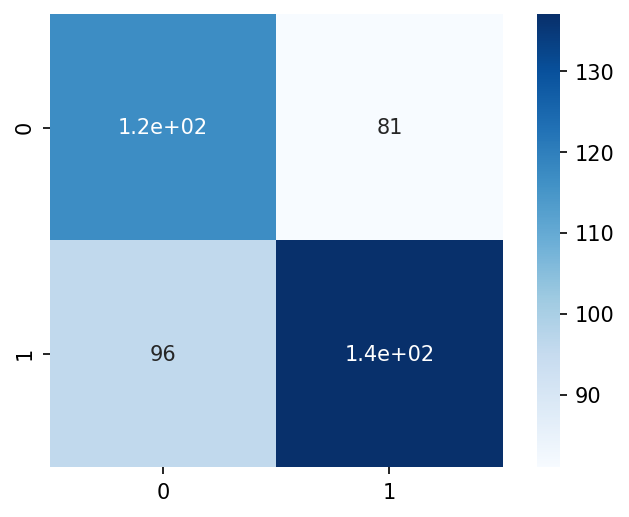

In [20]:
rf_confusion = confusion_matrix(y_test, rf.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True, square=True)
           #xticklabels=iris_dataset['target_names'],
           #yticklabels=iris_dataset['target_names'])
        

In [ ]:
df

In [ ]:
df_test.head()

In [ ]:
pd.DataFrame(df_game_sub_merged.isna().sum()).sort_values(by = 0, ascending = False).head(70)

In [ ]:
df_game_sub_merged.info(verbose=True, memory_usage='deep')

In [ ]:
df_away7_group[df_away7_group['game.id'] == '07e2d14a-8de8-48e8-92a4-efbe4a4b0921']

In [ ]:
cols = ['era_1_away',
 'whip_1_away',
 'k9_1_away',
 'pitch_count_1_away',
 'obp_1_away',
 'ops_1_away',
 'slg_1_away',
 'rbi_1_away',
 'avg_1_away',
 'av_risp_1_away',
 'hit_risp_1_away',
 'runs_1_away',
 'error_1_away',
 'fpct_1_away',
 'assists_1_away',
 'assists_7_away',
 'av_risp_7_away',
 'avg_7_away',
 'era_7_away',
 'error_7_away',
 'fpct_7_away',
 'hit_risp_7_away',
 'k9_7_away',
 'obp_7_away',
 'ops_7_away',
 'pitch_count_7_away',
 'rbi_7_away',
 'runs_7_away',
 'slg_7_away',
 'whip_7_away',
 'assists_30_away',
 'av_risp_30_away',
 'avg_30_away',
 'era_30_away',
 'error_30_away',
 'fpct_30_away',
 'hit_risp_30_away',
 'k9_30_away',
 'obp_30_away',
 'ops_30_away',
 'pitch_count_30_away',
 'rbi_30_away',
 'runs_30_away',
 'slg_30_away',
 'whip_30_away',
 'era_1_home',
 'whip_1_home',
 'k9_1_home',
 'pitch_count_1_home',
 'obp_1_home',
 'ops_1_home',
 'slg_1_home',
 'rbi_1_home',
 'avg_1_home',
 'av_risp_1_home',
 'hit_risp_1_home',
 'runs_1_home',
 'error_1_home',
 'fpct_1_home',
 'assists_1_home',
 'assists_7_home',
 'av_risp_7_home',
 'avg_7_home',
 'era_7_home',
 'error_7_home',
 'fpct_7_home',
 'hit_risp_7_home',
 'k9_7_home',
 'obp_7_home',
 'ops_7_home',
 'pitch_count_7_home',
 'rbi_7_home',
 'runs_7_home',
 'slg_7_home',
 'whip_7_home',
 'assists_30_home',
 'av_risp_30_home',
 'avg_30_home',
 'era_30_home',
 'error_30_home',
 'fpct_30_home',
 'hit_risp_30_home',
 'k9_30_home',
 'obp_30_home',
 'ops_30_home',
 'pitch_count_30_home',
 'rbi_30_home',
 'runs_30_home',
 'slg_30_home',
 'whip_30_home']

In [ ]:
df_game_sub_merged.columns.to_list()

In [ ]:
df_test = df_game_sub_merged[cols].dropna(how='all')
df_test = df_test.dropna(axis=1, how='all')
df_test.info()

In [ ]:
df_game_sub_merged.tail(20)

In [ ]:
df_away30_group.shape

In [ ]:
col_list = df_game_sub_merged.columns.to_list()

In [ ]:
col_list

In [ ]:
df_game_sub.head()

In [ ]:
df_away1_group = df_away1.groupby('game_id').mean().reset_index()

In [ ]:
gamefile_list = glob.glob('/Users/JacKuo14/Documents/Metis/course_work/project03_baseball/sportstrader_data/*game*.pkl')


In [ ]:
read_pickle()


In [ ]:
stats_list = ['era', 
              'whip',
              'k9', 
              'pitch_count', 
              'obp', 
              'ops', 'slg', 'rbi', 'avg', 'av_risp', 'hit_risp', 'runs', 'error', 'fpct', 'assists']